In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df =pd.read_csv("C:/Users/Dareen/Downloads/full_gen_data.csv")
df.head()

,country,article,sales,regular_price,current_price,ratio,retailweek,promo1,promo2,customer_id,...,style,sizes,gender,rgb_r_main_col,rgb_g_main_col,rgb_b_main_col,rgb_r_sec_col,rgb_g_sec_col,rgb_b_sec_col,label
0,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,slim,"xxs,xs,s,m,l,xl,xxl",women,205,104,57,255,187,255,0
1,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,regular,"xxs,xs,s,m,l,xl,xxl",women,188,238,104,255,187,255,0
2,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,regular,"xxs,xs,s,m,l,xl,xxl",women,205,173,0,255,187,255,0
3,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,regular,"xxs,xs,s,m,l,xl,xxl",kids,205,140,149,164,211,238,0
4,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,regular,"xxs,xs,s,m,l,xl,xxl",women,138,43,226,164,211,238,0


dealing with numerical values

In [3]:
for i in df.columns:
    if len( df[i].unique())<10:
        print (f'{i} : values{df[i].unique()}')
    
        

country : values['Germany' 'Austria' 'France']
promo1 : values[0 1]
promo2 : values[0 1]
productgroup : values['SHOES' 'SHORTS' 'HARDWARE ACCESSORIES' 'SWEATSHIRTS']
category : values['TRAINING' 'GOLF' 'RUNNING' 'RELAX CASUAL' 'FOOTBALL GENERIC' 'INDOOR']
style : values['slim' 'regular' 'wide']
sizes : values['xxs,xs,s,m,l,xl,xxl' 'xs,s,m,l,xl']
gender : values['women' 'kids' 'unisex' 'men']
rgb_r_main_col : values[205 188 138  79 139 135 181]
rgb_r_sec_col : values[255 164 205]
rgb_g_sec_col : values[187 211 155]
rgb_b_sec_col : values[255 238 155]
label : values[0 1]


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   country         100000 non-null  object 
 1   article         100000 non-null  object 
 2   sales           100000 non-null  int64  
 3   regular_price   100000 non-null  float64
 4   current_price   100000 non-null  float64
 5   ratio           100000 non-null  float64
 6   retailweek      100000 non-null  object 
 7   promo1          100000 non-null  int64  
 8   promo2          100000 non-null  int64  
 9   customer_id     100000 non-null  float64
 10  article.1       100000 non-null  object 
 11  productgroup    100000 non-null  object 
 12  category        100000 non-null  object 
 13  cost            100000 non-null  float64
 14  style           100000 non-null  object 
 15  sizes           100000 non-null  object 
 16  gender          100000 non-null  object 
 17  rgb_r_main_

In [5]:
for i in df.columns:
    if df[i].dtype==object and len(df[i].unique() )< 10:
        print(f'{i} count ={len(df[i].unique())}')
        

country count =3
productgroup count =4
category count =6
style count =3
sizes count =2
gender count =4


In [6]:
from sklearn.preprocessing import  LabelBinarizer
lb = LabelBinarizer()
df["sizes"] = lb.fit_transform(df["sizes"])

In [7]:
labels =['gender','style','category','productgroup','country']
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in labels:
    df[i]=le.fit_transform(df[i])


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   country         100000 non-null  int32  
 1   article         100000 non-null  object 
 2   sales           100000 non-null  int64  
 3   regular_price   100000 non-null  float64
 4   current_price   100000 non-null  float64
 5   ratio           100000 non-null  float64
 6   retailweek      100000 non-null  object 
 7   promo1          100000 non-null  int64  
 8   promo2          100000 non-null  int64  
 9   customer_id     100000 non-null  float64
 10  article.1       100000 non-null  object 
 11  productgroup    100000 non-null  int32  
 12  category        100000 non-null  int32  
 13  cost            100000 non-null  float64
 14  style           100000 non-null  int32  
 15  sizes           100000 non-null  int32  
 16  gender          100000 non-null  int32  
 17  rgb_r_main_

In [9]:
for i in df.columns:
    if df[i].dtype == object:
        print(i)

article
retailweek
article.1


In [10]:
object_columns=["article",'retailweek','article.1']
print(df[object_columns].isnull().sum())


article       0
retailweek    0
article.1     0
dtype: int64


In [11]:
for i in object_columns:
    print(f"{i} unique values : {len(df[i].unique())}") 

article unique values : 477
retailweek unique values : 123
article.1 unique values : 10


In [12]:
df["article.1"] =le.fit_transform(df["article.1"])

In [13]:
for i in df.columns:
    if df[i].dtype == object:
        print(i)

article
retailweek


In [14]:
df = df.drop("retailweek",axis=1)

In [15]:
df['article']=le.fit_transform(df['article'])

In [16]:
for i in df.columns:
    if df[i].dtype == object:
        print(i)

seeing the correlations between the data and the target column

In [17]:
correlations = df.corr()["label"]
print(correlations)


country          -0.006141
article          -0.001779
sales            -0.116651
regular_price    -0.015027
current_price     0.183402
ratio             0.447122
promo1            0.064105
promo2            0.020165
customer_id       0.004006
article.1        -0.000402
productgroup     -0.002705
category         -0.002709
cost              0.002130
style            -0.001272
sizes            -0.003196
gender            0.001439
rgb_r_main_col   -0.001328
rgb_g_main_col   -0.007542
rgb_b_main_col   -0.001214
rgb_r_sec_col    -0.003000
rgb_g_sec_col     0.002536
rgb_b_sec_col     0.000962
label             1.000000
Name: label, dtype: float64


In [18]:
df = df .drop(["article.1","rgb_b_sec_col"] ,axis=1)

In [19]:
imp = ['sales','ratio','current_price']

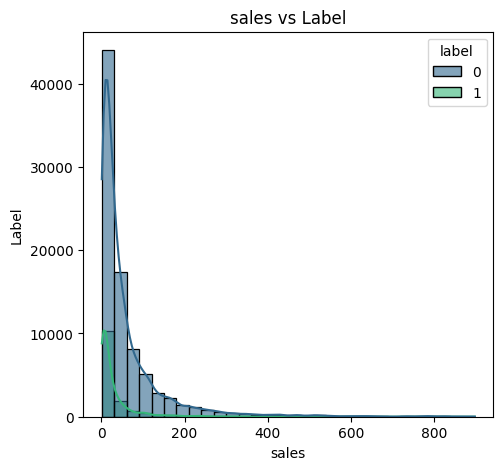

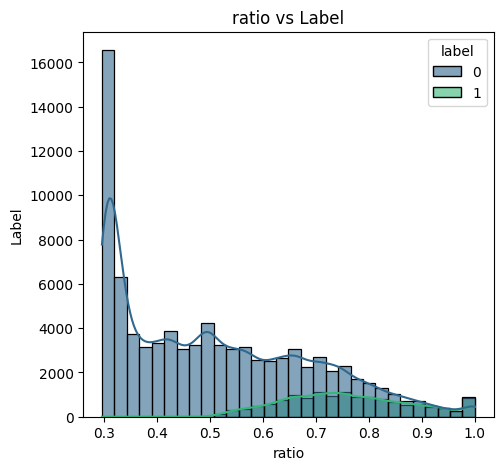

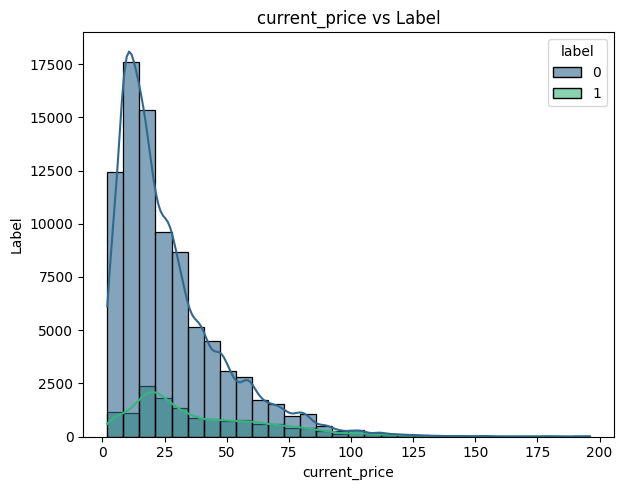

In [20]:
for i, feature in enumerate(imp, 1):
    plt.figure(figsize=(18, 5))
    plt.subplot(1, 3, i)
    sns.histplot(data=df, x=feature, hue='label', kde=True, palette='viridis', bins=30, alpha=0.6)
    plt.title(f'{feature} vs Label')
    plt.xlabel(feature)
    plt.ylabel('Label')

plt.tight_layout()
plt.show()

checking the data for outliers 

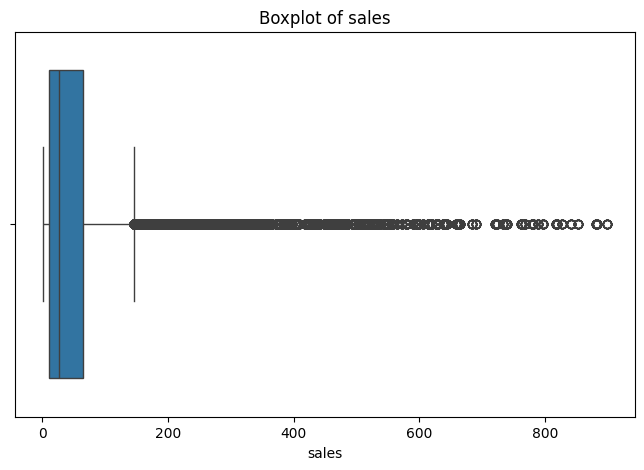

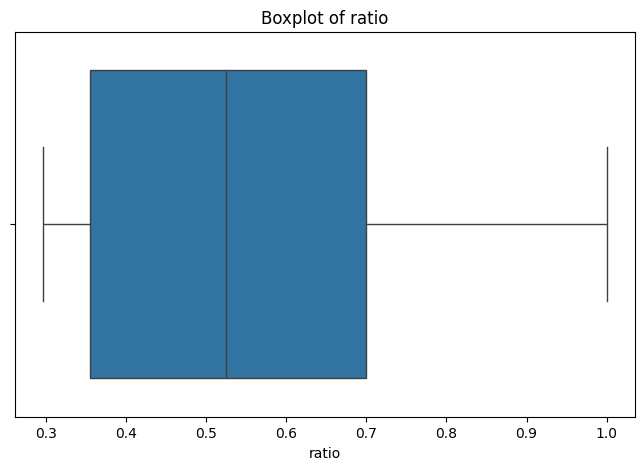

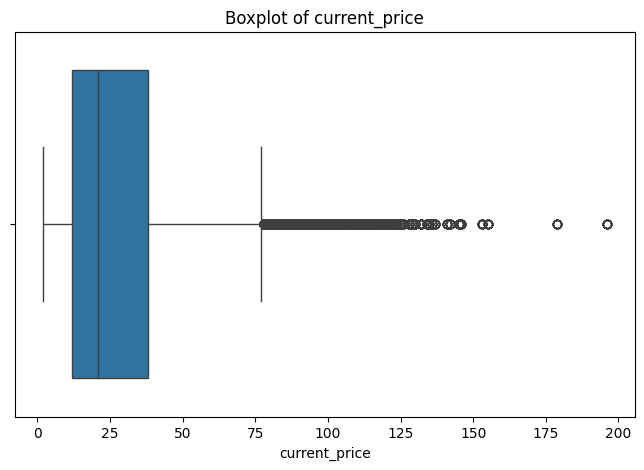

In [21]:
for column in imp:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()


In [22]:
for column in imp:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    print(f'{column}: Outliers below {lower_bound} and above {upper_bound}')


sales: Outliers below -71.0 and above 145.0
ratio: Outliers below -0.16177540625758074 and above 1.2158622362357518
current_price: Outliers below -27.050000000000008 and above 76.95000000000002


In [23]:
df['sales_log'] = np.log1p(df['sales'])
df['current_price_log'] = np.log1p(df['current_price'])


In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['sales', 'current_price']] = scaler.fit_transform(df[['sales', 'current_price']])


In [25]:
df['price_diff'] = df['regular_price'] - df['current_price']
df['sales_ratio'] = df['sales'] / (df['regular_price'] + 1e-5)

In [26]:
df['promo_combined'] = df['promo1'] + df['promo2']

In [27]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   country            100000 non-null  int32  
 1   article            100000 non-null  int32  
 2   sales              100000 non-null  float64
 3   regular_price      100000 non-null  float64
 4   current_price      100000 non-null  float64
 5   ratio              100000 non-null  float64
 6   promo1             100000 non-null  int64  
 7   promo2             100000 non-null  int64  
 8   customer_id        100000 non-null  float64
 9   productgroup       100000 non-null  int32  
 10  category           100000 non-null  int32  
 11  cost               100000 non-null  float64
 12  style              100000 non-null  int32  
 13  sizes              100000 non-null  int32  
 14  gender             100000 non-null  int32  
 15  rgb_r_main_col     100000 non-null  int64  
 16  rgb

check if data is balanced or not 

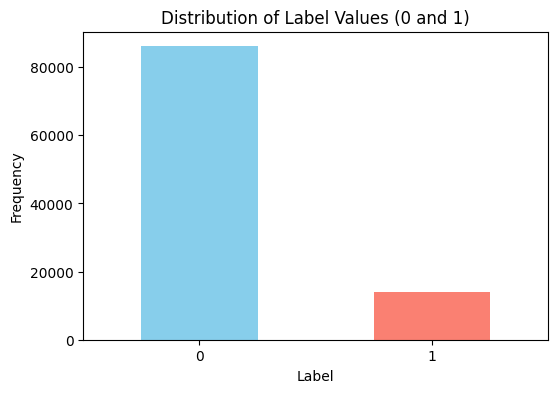

In [28]:
plt.figure(figsize=(6, 4))
df['label'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Label Values (0 and 1)')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

In [29]:
from sklearn.model_selection import train_test_split
x = df.drop("label",axis=1)
y = df["label"]


In [30]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [31]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_res, y_res = smote.fit_resample(X_train, y_train)

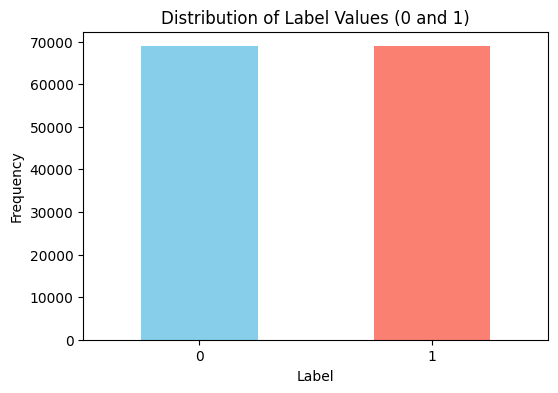

In [32]:
plt.figure(figsize=(6, 4))
y_res.value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Label Values (0 and 1)')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

building the models

In [37]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(solver='liblinear')
lr.fit(x_res,y_res)
pred1=lr.predict(X_test)

from sklearn.metrics import accuracy_score,f1_score,roc_auc_score,classification_report
acc=accuracy_score(y_test,pred1)
print(acc)
clas = classification_report(y_test,pred1)
print(clas)

0.7659
              precision    recall  f1-score   support

           0       0.95      0.76      0.85     17189
           1       0.35      0.77      0.48      2811

    accuracy                           0.77     20000
   macro avg       0.65      0.77      0.67     20000
weighted avg       0.87      0.77      0.80     20000



In [34]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'penalty': ['l1', 'l2'],  
    'C': [0.01, 0.1, 1, 10, 100],
}

grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_res, y_res)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f"Best Hyperparameters:{best_params}")

pred2 = best_model.predict(X_test)


c:\Users\Dareen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Dareen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Dareen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Dareen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Dareen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warni

Best Hyperparameters:{'C': 0.1, 'penalty': 'l2'}
              precision    recall  f1-score   support

           0       0.76      0.95      0.85     13718
           1       0.78      0.35      0.48      6282

    accuracy                           0.76     20000
   macro avg       0.77      0.65      0.66     20000
weighted avg       0.77      0.76      0.73     20000



In [38]:
clas2 = classification_report(y_test,pred2)
print(clas2)

              precision    recall  f1-score   support

           0       0.95      0.76      0.85     17189
           1       0.35      0.78      0.48      2811

    accuracy                           0.76     20000
   macro avg       0.65      0.77      0.66     20000
weighted avg       0.87      0.76      0.80     20000



In [36]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_res,y_res)
pred3 = knn.predict(X_test)
clas3=classification_report(y_test,pred3)
print(clas3)

              precision    recall  f1-score   support

           0       0.86      0.64      0.73     17189
           1       0.15      0.38      0.21      2811

    accuracy                           0.60     20000
   macro avg       0.50      0.51      0.47     20000
weighted avg       0.76      0.60      0.66     20000



In [42]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_res,y_res)
pred4= rf.predict(X_test)
acc=accuracy_score(y_test,pred4)
print(f' accuracy {acc}')
clas4 = classification_report(y_test,pred4)
print(clas4)

 accuracy 0.82865
              precision    recall  f1-score   support

           0       0.89      0.91      0.90     17189
           1       0.37      0.31      0.34      2811

    accuracy                           0.83     20000
   macro avg       0.63      0.61      0.62     20000
weighted avg       0.82      0.83      0.82     20000



In [43]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_test, y_test)


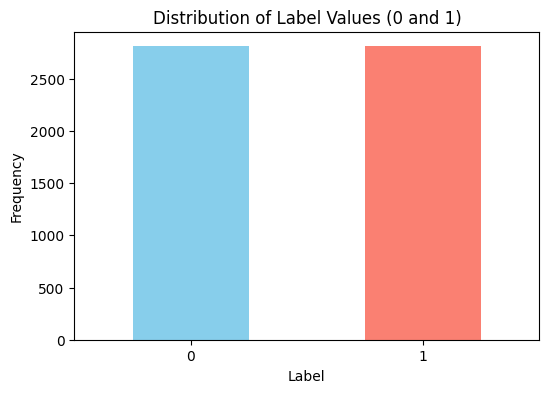

In [44]:
plt.figure(figsize=(6, 4))
y_resampled.value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Label Values (0 and 1)')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

In [45]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(solver='liblinear')
lr.fit(X_resampled,y_resampled)
pred1=lr.predict(X_test)

from sklearn.metrics import accuracy_score,f1_score,roc_auc_score,classification_report
acc=accuracy_score(y_test,pred1)
print(acc)
clas = classification_report(y_test,pred1)
print(clas)

0.7512
              precision    recall  f1-score   support

           0       0.97      0.74      0.84     17189
           1       0.34      0.84      0.49      2811

    accuracy                           0.75     20000
   macro avg       0.65      0.79      0.66     20000
weighted avg       0.88      0.75      0.79     20000



In [48]:

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_resampled, y_resampled)

pred4= rf.predict(X_test)
acc=accuracy_score(y_test,pred4)
print(f' accuracy {acc}')
clas4 = classification_report(y_test,pred4)
print(clas4)

 accuracy 0.7718
              precision    recall  f1-score   support

           0       1.00      0.73      0.85     17189
           1       0.38      1.00      0.55      2811

    accuracy                           0.77     20000
   macro avg       0.69      0.87      0.70     20000
weighted avg       0.91      0.77      0.81     20000



In [49]:
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight('balanced', classes=[0, 1], y=y_train)
print(f"Class Weights: {class_weights}")
model = RandomForestClassifier(class_weight={0: class_weights[0], 1: class_weights[1]})


Class Weights: [0.5806948  3.59809301]


In [50]:
from xgboost import XGBClassifier

model = XGBClassifier(scale_pos_weight=(len(y_train[y_train == 0]) / len(y_train[y_train == 1])), random_state=42)
model.fit(X_resampled, y_resampled)
pred5=model.predict(X_test)
clas5= classification_report(y_test,pred5)
print(clas5)


              precision    recall  f1-score   support

           0       1.00      0.65      0.79     17189
           1       0.32      1.00      0.48      2811

    accuracy                           0.70     20000
   macro avg       0.66      0.83      0.64     20000
weighted avg       0.90      0.70      0.75     20000



In [52]:
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=42)
X_resampled2, y_resampled2 = smote_enn.fit_resample(x, y)

In [55]:
from xgboost import XGBClassifier

model = XGBClassifier(scale_pos_weight=(len(y_train[y_train == 0]) / len(y_train[y_train == 1])), random_state=42)
model.fit(X_resampled2, y_resampled2)
pred5=model.predict(X_test)
clas5 = classification_report(y_test, pred5)
print(clas5)

              precision    recall  f1-score   support

           0       0.99      0.67      0.80     17189
           1       0.32      0.96      0.48      2811

    accuracy                           0.71     20000
   macro avg       0.66      0.81      0.64     20000
weighted avg       0.90      0.71      0.76     20000



In [56]:
y_prob = model.predict_proba(X_test)[:, 1]  
threshold = 0.3  
y_pred = (y_prob >= threshold).astype(int)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.62      0.76     17189
           1       0.30      0.98      0.46      2811

    accuracy                           0.67     20000
   macro avg       0.65      0.80      0.61     20000
weighted avg       0.90      0.67      0.72     20000



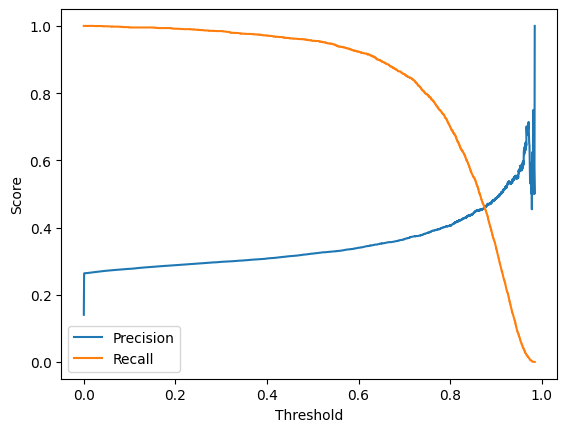

In [57]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.show()


In [62]:
from xgboost import XGBClassifier

scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])
xgb = XGBClassifier(scale_pos_weight=scale_pos_weight, random_state=42)
xgb.fit(X_train, y_train)
print(classification_report(y_test, xgb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.70      0.81     17189
           1       0.32      0.86      0.47      2811

    accuracy                           0.72     20000
   macro avg       0.64      0.78      0.64     20000
weighted avg       0.88      0.72      0.76     20000



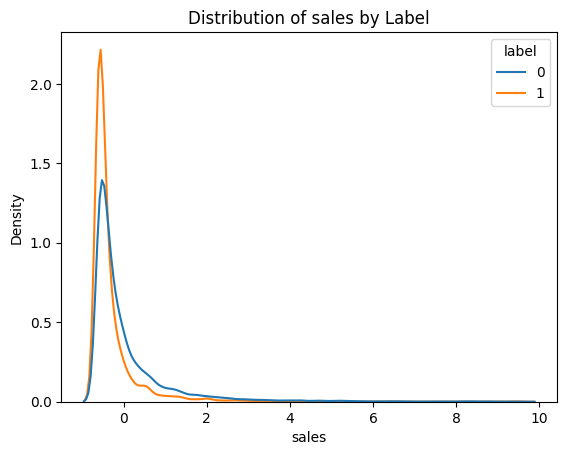

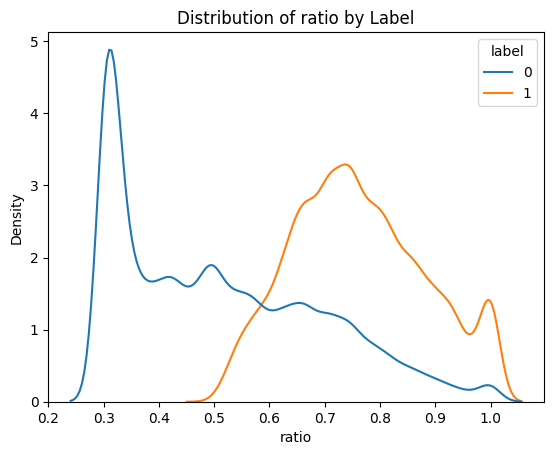

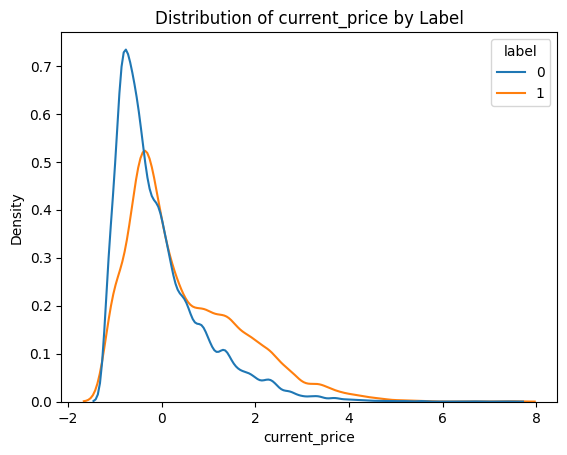

In [63]:

for col in ['sales', 'ratio', 'current_price']:
    sns.kdeplot(data=df, x=col, hue='label', common_norm=False)
    plt.title(f"Distribution of {col} by Label")
    plt.show()


In [87]:
from sklearn.model_selection import train_test_split

x2 = df[imp]
y2 = df['label']
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size=0.2, random_state=42)

print(f"x_train2 shape: {x_train2.shape}")
print(f"x_test2 shape: {x_test2.shape}")
print(f"y_train2 shape: {y_train2.shape}")
print(f"y_test2 shape: {y_test2.shape}")


x_train2 shape: (80000, 3)
x_test2 shape: (20000, 3)
y_train2 shape: (80000,)
y_test2 shape: (20000,)


In [88]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_res3, y_res3 = smote.fit_resample(x_train2, y_train2)

In [89]:
x_res3.shape

(137766, 3)

In [90]:
y_res3.shape

(137766,)

In [92]:
from xgboost import XGBClassifier

model = XGBClassifier(scale_pos_weight=(len(y_train[y_train == 0]) / len(y_train[y_train == 1])), random_state=42)
model.fit(x_res3, y_res3)
pred5=model.predict(x_test2)
clas5= classification_report(y_test2,pred5)
print(clas5)

              precision    recall  f1-score   support

           0       0.99      0.60      0.75     17189
           1       0.29      0.98      0.44      2811

    accuracy                           0.66     20000
   macro avg       0.64      0.79      0.60     20000
weighted avg       0.89      0.66      0.71     20000



In [94]:

model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(x_res3, y_res3)


pred6 = model.predict(x_test2)

acc = accuracy_score(y_test2, pred6)
print(f'Accuracy: {acc}')


clas6 = classification_report(y_test2, pred6)
print(clas6)


Accuracy: 0.7894
              precision    recall  f1-score   support

           0       0.92      0.83      0.87     17189
           1       0.34      0.53      0.42      2811

    accuracy                           0.79     20000
   macro avg       0.63      0.68      0.64     20000
weighted avg       0.84      0.79      0.81     20000

